In [1]:
from andreiNet.neural_net import NeuralNetwork
from andreiNet.utils import norm_data, one_hot_encode

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
boston = datasets.load_boston()

X = boston.data  
y = boston.target

#Choose Features \
feature_idxs = np.arange(X.shape[1]) # # SET FEATURES BY INDEX e.g. feature_idxs = [0, 1, 3] <------------------

#feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
#xlbl, ylbl = feature_names[feature_idxs[0]], feature_names[feature_idxs[1]] 
# We will also split the dataset into training and testing so we can evaluate the kNN classifier
X_trn_, X_test_, y_trn, y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.5, 
                                                 random_state=2)
X_trn, X_test = X_trn_[:, feature_idxs], X_test_[:, feature_idxs]

print("X_trn.shape = {}, X_test.shape = {}".format(X_trn.shape, X_test.shape))
X_trn_norm, (trn_mean, trn_std) = norm_data(X_trn)
X_test_norm = (X_test - trn_mean) / trn_std

X_trn.shape = (253, 13), X_test.shape = (253, 13)


In [4]:
# Train model
activation = 'ReLU'
batch_size = 50
random_state = 0
lr = 0.001
n_epochs = 1000
loss = 'MSE'
metrics = []
weight_init = 'he_norm'
hidden_layers = (100, )


start_time = time.time()
nn = NeuralNetwork(hidden=hidden_layers, 
                   init_weights=weight_init,
                   loss = loss,
                   activation=activation,
                   shuffle=True,
                   random_state=random_state,
                   metrics=metrics,
                   verbose=False,
                   mode='regression'
                   )
nn.train(X_trn_norm, y_trn, 
         n_epochs=n_epochs,
         batch_size=batch_size, 
         early_stop=None, #('accuracy', 100),
         lr=lr, 
         val_data=(X_test_norm, y_test),
         save_best=True)
y_pred_trn = nn.predict(X_trn_norm)
y_pred_test = nn.predict(X_test_norm)
delta_1 = time.time() - start_time
print("--- %s seconds ---" % (delta_1))
print('trn MSE', mean_squared_error(y_pred_trn, y_trn))
print('test MSE', mean_squared_error(y_pred_test, y_test))

model checkpoint 1
model checkpoint 2
model checkpoint 3
model checkpoint 4
model checkpoint 5
model checkpoint 6
model checkpoint 7
model checkpoint 8
model checkpoint 9
model checkpoint 10
model checkpoint 11
model checkpoint 12
model checkpoint 13
model checkpoint 14
model checkpoint 15
model checkpoint 16
model checkpoint 20
model checkpoint 21
model checkpoint 22
model checkpoint 23
model checkpoint 24
model checkpoint 25
model checkpoint 26
model checkpoint 27
model checkpoint 28
model checkpoint 29
model checkpoint 30
model checkpoint 31
model checkpoint 35
model checkpoint 36
model checkpoint 37
model checkpoint 38
model checkpoint 39
model checkpoint 42
model checkpoint 43
model checkpoint 44
model checkpoint 45
model checkpoint 47
model checkpoint 48
model checkpoint 50
model checkpoint 51
model checkpoint 52
model checkpoint 54
model checkpoint 55
model checkpoint 57
model checkpoint 58
model checkpoint 59
model checkpoint 60
model checkpoint 65
model checkpoint 69
model che

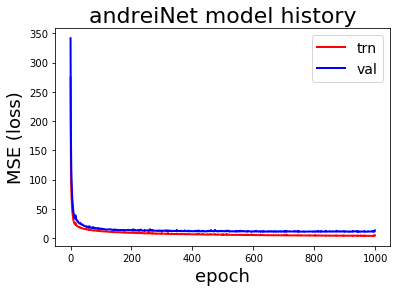

In [5]:
# Plot neural network history
loss = 'MSE'
fig_size = (6, 6)
x_axis = np.arange(len(nn.trn_metric_hist[loss]))
plt.plot(x_axis, nn.trn_metric_hist[loss], 
         c='r', linewidth=2, label='trn')
plt.plot(x_axis, nn.val_metric_hist[loss], 
         c='b', linewidth=2, label='val')
plt.xlabel('epoch', fontsize=18)
plt.ylabel(loss+' (loss)', 
           fontsize=18)
plt.legend(prop={'size': 14})
plt.title('andreiNet model history', fontsize=22)
plt.show()

In [6]:
# Train Keras model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow as tf
from tensorflow import set_random_seed
set_random_seed(random_state)
tf.logging.set_verbosity(tf.logging.ERROR)

np.random.seed(random_state)
start_time = time.time()

model = Sequential()
model.add(Dense(100, activation=activation.lower(), 
                input_dim=X_trn_norm.shape[1], 
                kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear',))

sgd = SGD(lr=lr, decay=0.0, momentum=0.00, nesterov=False)

model.compile(loss='MSE',
              optimizer=sgd,
              metrics=[])
keras_hist = model.fit(X_trn_norm, y_trn,
                       epochs=n_epochs,
                       validation_data=(X_test_norm, y_test),
                       batch_size=batch_size,
                       verbose=0)

y_pred_trn_keras = model.predict(X_trn_norm)
y_pred_test_keras = model.predict(X_test_norm)
delta_2 = time.time() - start_time
del model
print("--- %s seconds ---" % (delta_2))
print('trn MSE', mean_squared_error(y_pred_trn_keras, y_trn))
print('test MSE', mean_squared_error(y_pred_test_keras, y_test))

Using TensorFlow backend.


--- 7.872596025466919 seconds ---
trn MSE 3.5464524454846917
test MSE 11.821644092333917


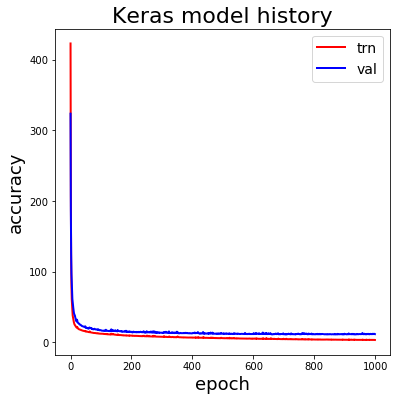

In [7]:
# Keras training history
fig_size = (6, 6)
x_axis = np.arange(n_epochs)
plt.figure(figsize=fig_size)

plt.plot(x_axis, keras_hist.history['loss'], 
         c='r', linewidth=2, label='trn')
plt.plot(x_axis, keras_hist.history['val_loss'], 
         c='b', linewidth=2, label='val')
plt.xlabel('epoch', fontsize=18)
plt.ylabel('accuracy', fontsize=18)
plt.legend(prop={'size': 14})

plt.title('Keras model history', fontsize=22)
plt.show()

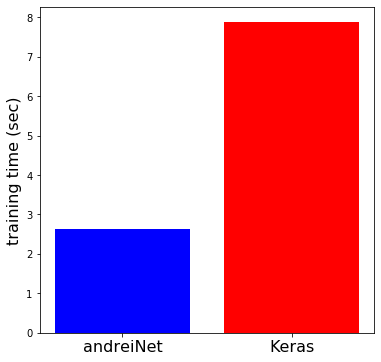

In [8]:
# compare training time
plt.figure(figsize=(6, 6))
trn_times = [delta_1, delta_2]
y_pos = [0, 1]
plt.bar(y_pos, trn_times, color=['blue', 'red'])
plt.xticks(y_pos, ['andreiNet', 'Keras'], fontsize=16) 
plt.ylabel('training time (sec)', fontsize=16)
plt.show()